In [5]:
# Auto reload
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
import os
import pandas as pd
import yaml
import re
import matplotlib.pyplot as plt
import seaborn as sns
from utils import *

# DATASET: VessMap

In [89]:
vessmap_rnet18_ft_lr_1e2_path = '/media/wesleygalvao/1_TB_LINUX/models_results/03_finetuned/multi_finetune_on_vessmap_resnet18_A_lr_e-2' 
vessmap_rnet18_ft_lr_1e3_path = '/media/wesleygalvao/1_TB_LINUX/models_results/03_finetuned/multi_finetune_on_vessmap_resnet18_A_lr_e-3'
vessmap_rnet18_ft_lr_1e4_path = '/media/wesleygalvao/1_TB_LINUX/models_results/03_finetuned/multi_finetune_on_vessmap_resnet18_A_lr_e-4' 
vessmap_rnet50_ft_lr_1e2_path = '/media/wesleygalvao/1_TB_LINUX/models_results/03_finetuned/multi_finetune_on_vessmap_resnet50_A_lr_e-2' 
vessmap_rnet50_ft_lr_1e3_path = '/media/wesleygalvao/1_TB_LINUX/models_results/03_finetuned/multi_finetune_on_vessmap_resnet50_A_lr_e-3'
vessmap_rnet50_ft_lr_1e4_path = '/media/wesleygalvao/1_TB_LINUX/models_results/03_finetuned/multi_finetune_on_vessmap_resnet50_A_lr_e-4' 
vessmap_rnet50_scratch_path = '/media/wesleygalvao/1_TB_LINUX/models_results/02_trained_from_scratch/multi_train_scratch_on_vessmap_resnet50'
vessmap_rnet18_scratch_path = '/media/wesleygalvao/1_TB_LINUX/models_results/02_trained_from_scratch/multi_train_scratch_on_vessmap_resnet18'
vessmap_zeroshot_path = './zero_shot_inferences'



vessmap_rnet18_ft_lr_1e2 = pd.read_csv(os.path.join(vessmap_rnet18_ft_lr_1e2_path, 'inference_metrics_mean.csv'))
vessmap_rnet18_ft_lr_1e3 = pd.read_csv(os.path.join(vessmap_rnet18_ft_lr_1e3_path, 'inference_metrics_mean.csv'))
vessmap_rnet18_ft_lr_1e4 = pd.read_csv(os.path.join(vessmap_rnet18_ft_lr_1e4_path, 'inference_metrics_mean.csv'))
vessmap_rnet50_ft_lr_1e2 = pd.read_csv(os.path.join(vessmap_rnet50_ft_lr_1e2_path, 'inference_metrics_mean.csv'))
vessmap_rnet50_ft_lr_1e3 = pd.read_csv(os.path.join(vessmap_rnet50_ft_lr_1e3_path, 'inference_metrics_mean.csv'))
vessmap_rnet50_ft_lr_1e4 = pd.read_csv(os.path.join(vessmap_rnet50_ft_lr_1e4_path, 'inference_metrics_mean.csv'))
vessmap_rnet50_scratch = pd.read_csv(os.path.join(vessmap_rnet50_scratch_path, 'inference_metrics_mean.csv'))
vessmap_rnet18_scratch = pd.read_csv(os.path.join(vessmap_rnet18_scratch_path, 'inference_metrics_mean.csv'))
vessmap_rnet_zeroshot = pd.read_csv(os.path.join(vessmap_zeroshot_path, 'zero_shot_inference_results_on_vessmap.csv'))
vessmap_rnet18_zeroshot = vessmap_rnet_zeroshot.loc[vessmap_rnet_zeroshot['model_class']=='resnet18_unet'].copy()
vessmap_rnet50_zeroshot = vessmap_rnet_zeroshot.loc[vessmap_rnet_zeroshot['model_class']=='resnet50_unet'].copy()

vessmap_rnet18_ft_lr_1e2['model_type'] = 'ResNet18 - Fine-tuned'
vessmap_rnet18_ft_lr_1e3['model_type'] = 'ResNet18 - Fine-tuned'
vessmap_rnet18_ft_lr_1e4['model_type'] = 'ResNet18 - Fine-tuned'

vessmap_rnet50_ft_lr_1e2['model_type'] = 'ResNet50 - Fine-tuned'
vessmap_rnet50_ft_lr_1e3['model_type'] = 'ResNet50 - Fine-tuned'
vessmap_rnet50_ft_lr_1e4['model_type'] = 'ResNet50 - Fine-tuned'

vessmap_rnet50_scratch['model_type'] = 'ResNet50 - From Scratch'
vessmap_rnet18_scratch['model_type'] = 'ResNet18 - From Scratch'

vessmap_rnet50_zeroshot['model_type'] = 'Zero-Shot ResNet50'
vessmap_rnet18_zeroshot['model_type'] = 'Zero-Shot ResNet18'


all_results_vessmap = pd.concat([ 
    vessmap_rnet18_ft_lr_1e2, 
    vessmap_rnet50_ft_lr_1e3, 
    vessmap_rnet50_scratch, 
    vessmap_rnet18_scratch,
    vessmap_rnet50_zeroshot,
    vessmap_rnet18_zeroshot
])

all_resnet18_vessmap = pd.concat([
    vessmap_rnet18_ft_lr_1e2, 
    vessmap_rnet18_ft_lr_1e3, 
    vessmap_rnet18_ft_lr_1e4,
    vessmap_rnet18_scratch,
    vessmap_rnet18_zeroshot
])

all_resnet50_vessmap = pd.concat([    
    vessmap_rnet50_ft_lr_1e2, 
    vessmap_rnet50_ft_lr_1e3, 
    vessmap_rnet50_ft_lr_1e4,
    vessmap_rnet50_scratch,
    vessmap_rnet50_zeroshot
])


In [76]:
all_results_vessmap.to_csv('all_inferences_results_on_vessmap.csv', index=False)

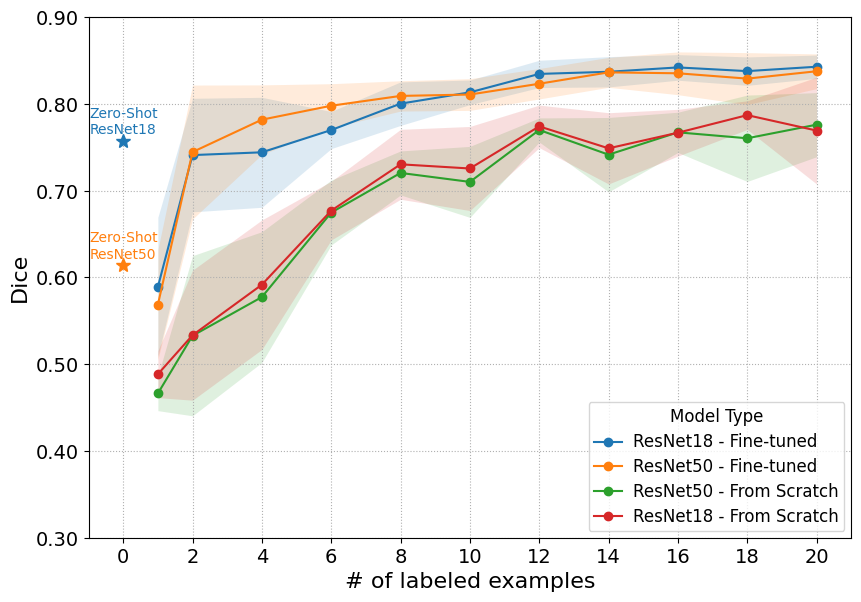

In [105]:
custom_styles = {
    'ResNet50 - Fine-tuned (lr=1e-3)': '--',
    'ResNet18 - Fine-tuned (lr=1e-2)': '--',
    'ResNet50 - From Scratch': '-',
    'ResNet18 - From Scratch': '-'
}
plot_mean_dice_score(
    all_results_vessmap,
    dataset_name='VessMap',
    hue='model_type',
    x_data='num_samples',
    y_data='Dice',
    line_styles=custom_styles,
    annotate_zero_shot=True,
    title='',
    legend_title='Model Type',
    save_path='vessmap_resnet_results.svg',
    font_sizes={
        'title': 16,
        'xlabel': 16,
        'ylabel': 16,
        'xaxis': 14,
        'yaxis': 14,
        'legend': 12,
        'zero_shot_annotation': 10,
        'zero_shot_marker': 10
    },
    figsize=(8.5, 6),
    y_limits=(0.30, 0.90),  # opcional
    legend_loc='lower right',  # exemplos: 'best', 'upper right', 'outside-right', (1.02, 0.5)
    share_zero_shot_color_with='finetuned'
)

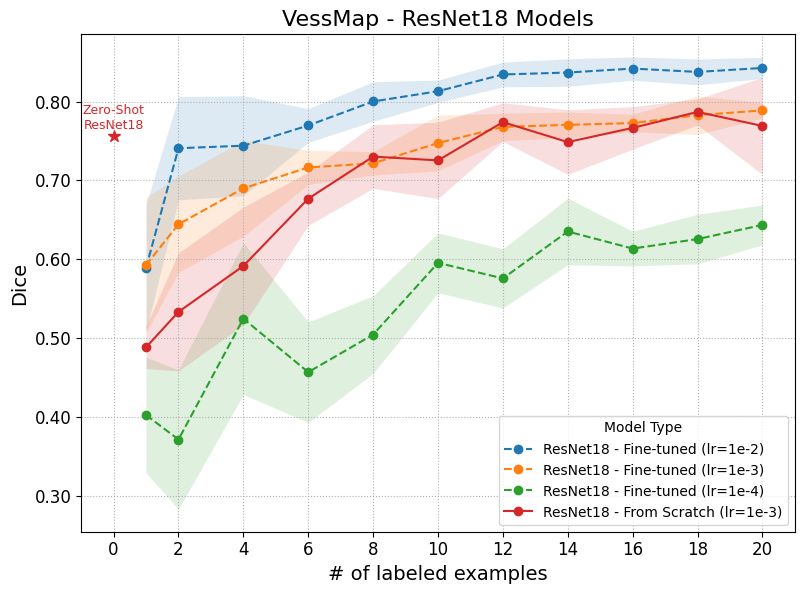

In [34]:
custom_styles = {
    'ResNet18 - Fine-tuned (lr=1e-2)': '--',
    'ResNet18 - Fine-tuned (lr=1e-3)': '--',
    'ResNet18 - Fine-tuned (lr=1e-4)': '--',
    'ResNet18 - Scratch': '-',
}
plot_mean_dice_score(
    all_resnet18_vessmap,
    dataset_name='VessMap',
    hue='model_type',
    x_data='num_samples',
    y_data='Dice',
    line_styles=custom_styles,
    annotate_zero_shot=True,
    title='VessMap - ResNet18 Models',
    legend_title='Model Type',
    save_path='vessmap_resnet_results.png',
    font_sizes={
        'title': 16,
        'xlabel': 14,
        'ylabel': 14,
        'xaxis': 12,
        'yaxis': 12,
        'legend': 10,
        'zero_shot_annotation': 9,
        'zero_shot_marker': 9
    },
    figsize=(8, 6)
)

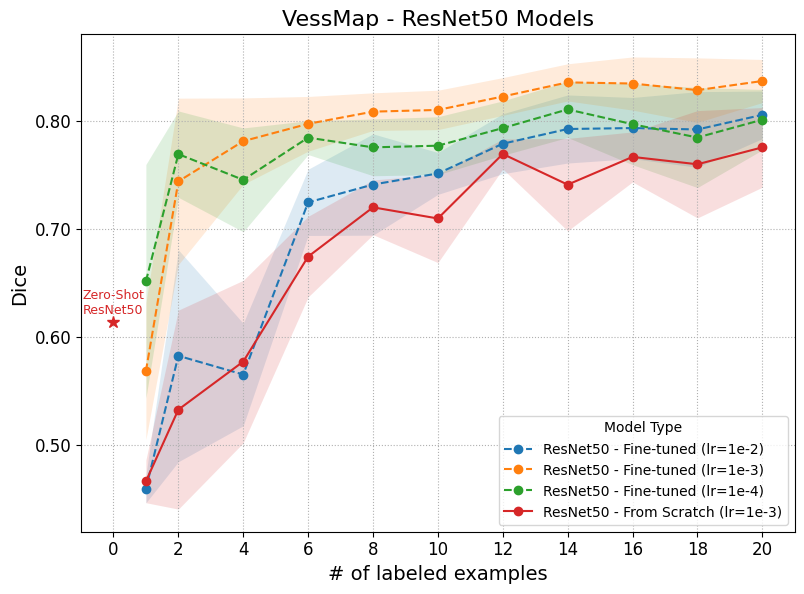

In [35]:
custom_styles = {
    'ResNet50 - Fine-tuned (lr=1e-2)': '--',
    'ResNet50 - Fine-tuned (lr=1e-3)': '--',
    'ResNet50 - Fine-tuned (lr=1e-4)': '--',
    'ResNet50 - Scratch': '-'
}
plot_mean_dice_score(
    all_resnet50_vessmap,
    dataset_name='VessMap',
    hue='model_type',
    x_data='num_samples',
    y_data='Dice',
    line_styles=custom_styles,
    annotate_zero_shot=True,
    title='VessMap - ResNet50 Models',
    legend_title='Model Type',
    save_path='vessmap_resnet_results.png',
    font_sizes={
        'title': 16,
        'xlabel': 14,
        'ylabel': 14,
        'xaxis': 12,
        'yaxis': 12,
        'legend': 10,
        'zero_shot_annotation': 9,
        'zero_shot_marker': 9
    },
    figsize=(8, 6)
)

In [ ]:
#plot_mean_dice_score_px(all_results_vessmap, dataset_name='VessMap', hue='model_type', x_data='num_samples', y_data='Dice', line_styles=custom_styles)

# DATASET: Drive

In [92]:
drive_rnet50_ft_lr_1e2_path = '/media/wesleygalvao/1_TB_LINUX/models_results/03_finetuned/multi_finetune_on_drive_resnet50_A_lr_e-2'
drive_rnet18_ft_lr_1e2_path = '/media/wesleygalvao/1_TB_LINUX/models_results/03_finetuned/multi_finetune_on_drive_resnet18_A_lr_e-2'
drive_rnet50_ft_lr_1e3_path = '/media/wesleygalvao/1_TB_LINUX/models_results/03_finetuned/multi_finetune_on_drive_resnet50_A_lr_e-3'
drive_rnet18_ft_lr_1e3_path = '/media/wesleygalvao/1_TB_LINUX/models_results/03_finetuned/multi_finetune_on_drive_resnet18_A_lr_e-3'
drive_rnet50_scratch_path = '/media/wesleygalvao/1_TB_LINUX/models_results/02_trained_from_scratch/multi_train_scratch_on_drive_resnet50'
drive_rnet18_scratch_path = '/media/wesleygalvao/1_TB_LINUX/models_results/02_trained_from_scratch/multi_train_scratch_on_drive_resnet18'
drive_zeroshot_path = './zero_shot_inferences'

drive_rnet50_ft_lr_1e2 = pd.read_csv(os.path.join(drive_rnet50_ft_lr_1e2_path, 'inference_metrics_mean.csv'))
drive_rnet18_ft_lr_1e2 = pd.read_csv(os.path.join(drive_rnet18_ft_lr_1e2_path, 'inference_metrics_mean.csv'))
drive_rnet50_ft_lr_1e3 = pd.read_csv(os.path.join(drive_rnet50_ft_lr_1e3_path, 'inference_metrics_mean.csv'))
drive_rnet18_ft_lr_1e3 = pd.read_csv(os.path.join(drive_rnet18_ft_lr_1e3_path, 'inference_metrics_mean.csv'))
drive_rnet50_scratch = pd.read_csv(os.path.join(drive_rnet50_scratch_path, 'inference_metrics_mean.csv'))
drive_rnet18_scratch = pd.read_csv(os.path.join(drive_rnet18_scratch_path, 'inference_metrics_mean.csv'))
drive_zeroshot = pd.read_csv(os.path.join(drive_zeroshot_path, 'zero_shot_inference_results_on_drive.csv'))

drive_rnet18_zeroshot = drive_zeroshot.loc[drive_zeroshot['model_class']=='resnet18_unet'].copy()
drive_rnet50_zeroshot = drive_zeroshot.loc[drive_zeroshot['model_class']=='resnet50_unet'].copy()


drive_rnet50_ft_lr_1e3['model_type'] = 'ResNet50 - Fine-tuned'
drive_rnet18_ft_lr_1e3['model_type'] = 'ResNet18 - Fine-tuned'
drive_rnet50_ft_lr_1e2['model_type'] = 'ResNet50 - Fine-tuned'
drive_rnet18_ft_lr_1e2['model_type'] = 'ResNet18 - Fine-tuned'
drive_rnet50_scratch['model_type'] = 'ResNet50 - From Scratch'
drive_rnet18_scratch['model_type'] = 'ResNet18 - From Scratch'
drive_rnet50_zeroshot['model_type'] = 'Zero-Shot ResNet50'
drive_rnet18_zeroshot['model_type'] = 'Zero-Shot ResNet18'

all_results_drive = pd.concat([drive_rnet50_ft_lr_1e3, drive_rnet18_ft_lr_1e3, drive_rnet50_ft_lr_1e2, drive_rnet18_ft_lr_1e2, drive_rnet50_scratch, drive_rnet18_scratch, drive_rnet50_zeroshot, drive_rnet18_zeroshot])
best_results_drive = pd.concat([
    drive_rnet50_ft_lr_1e3,
    drive_rnet18_ft_lr_1e2,
    drive_rnet50_scratch,
    drive_rnet18_scratch,
    drive_rnet50_zeroshot,
    drive_rnet18_zeroshot
])

In [77]:
all_results_drive.to_csv('all_inferences_results_on_drive.csv', index=False)

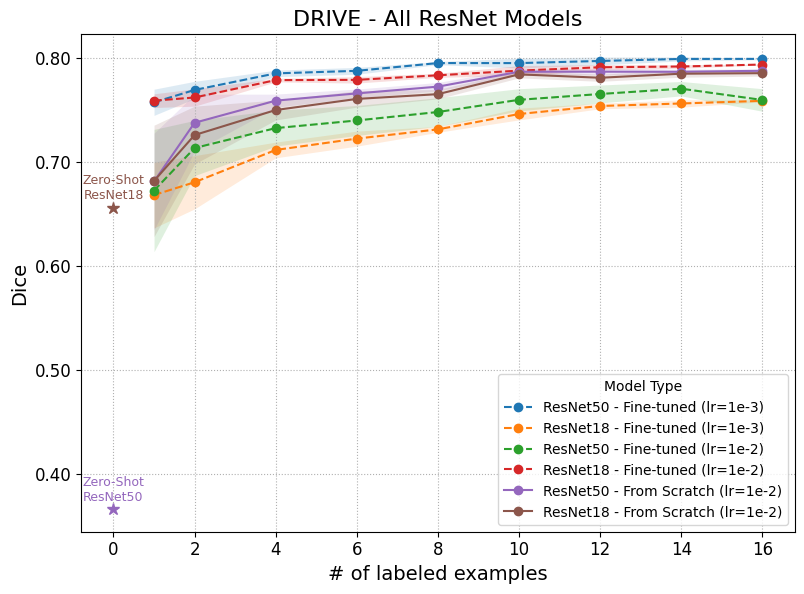

In [ ]:
custom_styles = {
    'ResNet50 - Fine-tuned (lr=1e-3)': '--',
    'ResNet18 - Fine-tuned (lr=1e-3)': '--',
    'ResNet50 - Fine-tuned (lr=1e-2)': '--',
    'ResNet18 - Fine-tuned (lr=1e-2)': '--',
    'ResNet50 - From Scratch': '-',
    'ResNet18 - From Scratch': '-'
}
plot_mean_dice_score(
    all_results_drive,
    dataset_name='Drive',
    hue='model_type',
    x_data='num_samples',
    y_data='Dice',
    line_styles=custom_styles,
    annotate_zero_shot=True,
    title='DRIVE - All ResNet Models',
    legend_title='Model Type',
    save_path='drive_resnet_results.svg',
    font_sizes={
        'title': 16,
        'xlabel': 14,
        'ylabel': 14,
        'xaxis': 12,
        'yaxis': 12,
        'legend': 10,
        'zero_shot_annotation': 9,
        'zero_shot_marker': 9
    },
    figsize=(8, 6),
    # y_limits=(0.0, 1.0),  # opcional
    # legend_loc='outside-right'  # opcional; ex.: 'best', 'upper right', 'outside-right', (1.02, 0.5)
)

Testar o Inset Plot
https://matplotlib.org/stable/gallery/axes_grid1/inset_locator_demo.html
https://stackoverflow.com/questions/55479414/how-to-embed-inset-plots-generated-with-seaborn-lmplot

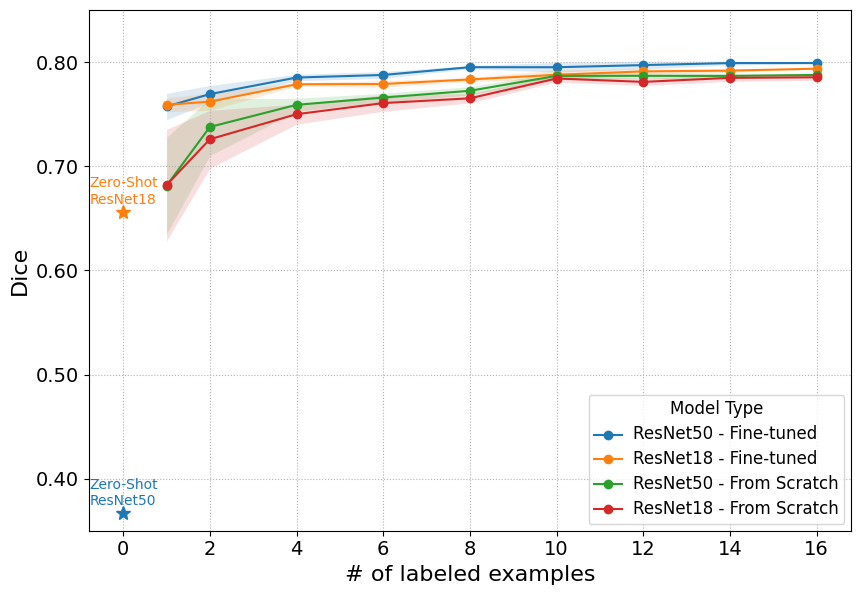

In [108]:
custom_styles = {
    'ResNet50 - Fine-tuned (lr=1e-3)': '--',
    'ResNet18 - Fine-tuned (lr=1e-2)': '--',
    'ResNet50 - From Scratch': '-',
    'ResNet18 - From Scratch': '-'
}
plot_mean_dice_score(
    best_results_drive,
    dataset_name='Drive',
    hue='model_type',
    x_data='num_samples',
    y_data='Dice',
    line_styles=custom_styles,
    annotate_zero_shot=True,
    title='',
    legend_title='Model Type',
    save_path='drive_resnet_results.svg',
    font_sizes={
        'title': 16,
        'xlabel': 16,
        'ylabel': 16,
        'xaxis': 14,
        'yaxis': 14,
        'legend': 12,
        'zero_shot_annotation': 10,
        'zero_shot_marker': 10
    },
    figsize=(8.5, 6),
    y_limits=(0.35, 0.85),  # opcional
    legend_loc='lower right',
    share_zero_shot_color_with='finetuned'
)

# Models trained on VessMap from Scratch vs Models pre-trained on Vess-Shape and then fine-tuned on VessMap

In [4]:
resnet50_finetuned_path = '/media/wesleygalvao/1_TB_LINUX/models_results/03_finetuned/multi_finetune_on_vessmap_resnet50_A'
resnet50_from_scratch_path = '/media/wesleygalvao/1_TB_LINUX/models_results/02_trained_from_scratch/multi_train_scratch_on_vessmap_resnet50'
resnet18_from_scratch_path = '/media/wesleygalvao/1_TB_LINUX/models_results/02_trained_from_scratch/multi_train_scratch_on_vessmap_resnet18'


resnet50_finetuned_results = get_experiments_raw_stats(resnet50_finetuned_path)
resnet50_scratch_results = get_experiments_raw_stats(resnet50_from_scratch_path)
resnet18_scratch_results = get_experiments_raw_stats(resnet18_from_scratch_path)

resnet50_scratch_grouped_run = get_experiments_grouped_stats(resnet50_scratch_results, ['model_class', 'samples', 'wandb_group', 'run'], 'Dice', ['mean', 'median', 'std'])
resnet18_scratch_grouped_run = get_experiments_grouped_stats(resnet18_scratch_results, ['model_class', 'samples', 'wandb_group', 'run'], 'Dice', ['mean', 'median', 'std'])
resnet50_finetuned_grouped_run = get_experiments_grouped_stats(resnet50_finetuned_results, ['model_class', 'samples', 'wandb_group', 'run'], 'Dice', ['mean', 'median', 'std'])

resnet50_scratch_grouped_samples = get_experiments_grouped_stats(resnet50_scratch_grouped_run, ['model_class', 'samples', 'wandb_group'], 'mean_Dice', ['mean', 'median', 'std'])
resnet18_scratch_grouped_samples = get_experiments_grouped_stats(resnet18_scratch_grouped_run, ['model_class', 'samples', 'wandb_group'], 'mean_Dice', ['mean', 'median', 'std'])
resnet50_finetuned_grouped_samples = get_experiments_grouped_stats(resnet50_finetuned_grouped_run, ['model_class', 'samples', 'wandb_group'], 'mean_Dice', ['mean', 'median', 'std'])

resnet50_scratch_grouped_samples['model_type'] = resnet50_scratch_grouped_samples['model_class'] + '_scratch'
resnet18_scratch_grouped_samples['model_type'] = resnet18_scratch_grouped_samples['model_class'] + '_scratch'
resnet50_finetuned_grouped_samples['model_type'] = resnet50_finetuned_grouped_samples['model_class'] + '_finetuned'

all_stats_grouped_by_samples_vessmap = pd.concat([resnet50_scratch_grouped_samples, resnet18_scratch_grouped_samples, resnet50_finetuned_grouped_samples])


In [5]:
all_stats_grouped_by_samples_vessmap

,model_class,samples,wandb_group,mean_Dice,median_Dice,std_Dice,model_type
0,resnet50_unet,20,resnet50_unet | lr:0.001 | weights_id:FromScra...,0.871863,0.871275,0.004024,resnet50_unet_scratch
1,resnet50_unet,18,resnet50_unet | lr:0.001 | weights_id:FromScra...,0.853072,0.854691,0.020353,resnet50_unet_scratch
2,resnet50_unet,16,resnet50_unet | lr:0.001 | weights_id:FromScra...,0.849404,0.849017,0.012170,resnet50_unet_scratch
3,resnet50_unet,14,resnet50_unet | lr:0.001 | weights_id:FromScra...,0.846193,0.855451,0.017514,resnet50_unet_scratch
4,resnet50_unet,12,resnet50_unet | lr:0.001 | weights_id:FromScra...,0.835322,0.834844,0.012630,resnet50_unet_scratch
5,resnet50_unet,10,resnet50_unet | lr:0.001 | weights_id:FromScra...,0.830737,0.829197,0.012525,resnet50_unet_scratch
6,resnet50_unet,8,resnet50_unet | lr:0.001 | weights_id:FromScra...,0.744821,0.749681,0.018131,resnet50_unet_scratch
7,resnet50_unet,6,resnet50_unet | lr:0.001 | weights_id:FromScra...,0.718152,0.713293,0.056637,resnet50_unet_scratch
8,resnet50_unet,4,resnet50_unet | lr:0.001 | weights_id:FromScra...,0.626603,0.602814,0.097633,resnet50_unet_scratch
9,resnet50_unet,2,resnet50_unet | lr:0.001 | weights_id:FromScra...,0.670723,0.671522,0.036687,resnet50_unet_scratch


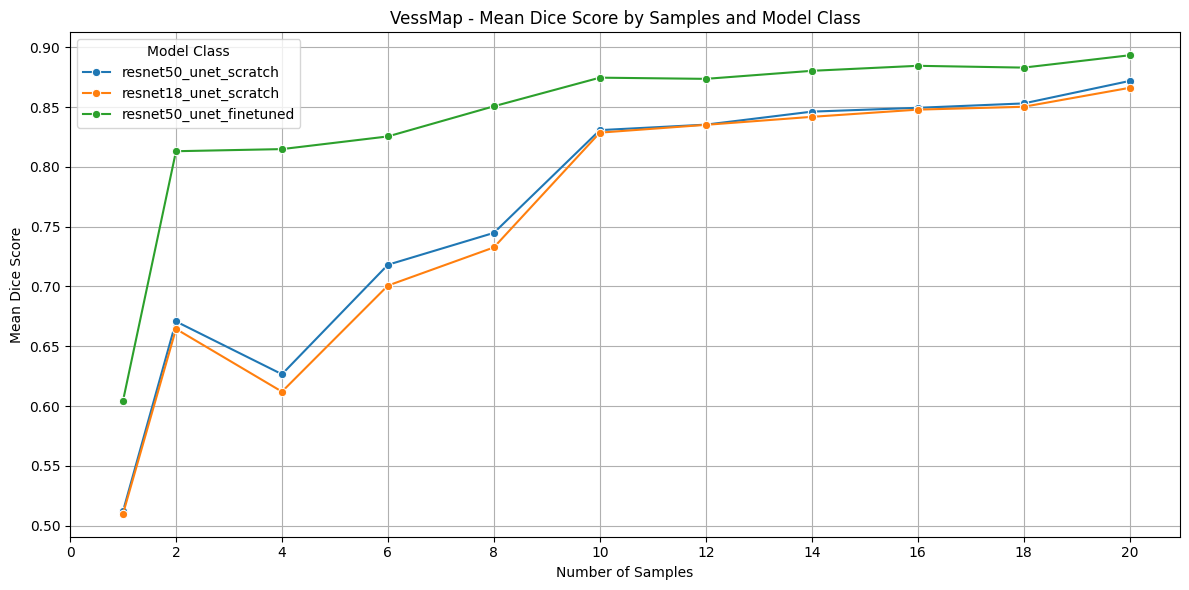

In [10]:
plot_mean_dice_score(all_stats_grouped_by_samples_vessmap, dataset_name='VessMap')

# Models trained on VessMap from Scratch vs Models pre-trained on Vess-Shape and then fine-tuned on DRIVE

In [7]:
resnet50_finetuned_path = '/media/wesleygalvao/1_TB_LINUX/models_results/03_finetuned/multi_finetune_on_drive_resnet50_A'
resnet18_finetuned_path = '/media/wesleygalvao/1_TB_LINUX/models_results/03_finetuned/multi_finetune_on_drive_resnet18_A'
resnet18_from_scratch_path = '/media/wesleygalvao/1_TB_LINUX/models_results/02_trained_from_scratch/multi_train_scratch_on_drive_resnet18_2'
resnet50_from_scratch_path = '/media/wesleygalvao/1_TB_LINUX/models_results/02_trained_from_scratch/multi_train_scratch_on_drive_resnet50_2'


resnet50_finetuned_results = get_experiments_raw_stats(resnet50_finetuned_path)
resnet18_finetuned_results = get_experiments_raw_stats(resnet18_finetuned_path)
resnet50_scratch_results = get_experiments_raw_stats(resnet50_from_scratch_path)
resnet18_scratch_results = get_experiments_raw_stats(resnet18_from_scratch_path)

resnet50_scratch_grouped_run = get_experiments_grouped_stats(resnet50_scratch_results, ['model_class', 'samples', 'wandb_group', 'run'], 'Dice', ['mean', 'median', 'std'])
resnet18_scratch_grouped_run = get_experiments_grouped_stats(resnet18_scratch_results, ['model_class', 'samples', 'wandb_group', 'run'], 'Dice', ['mean', 'median', 'std'])
resnet50_finetuned_grouped_run = get_experiments_grouped_stats(resnet50_finetuned_results, ['model_class', 'samples', 'wandb_group', 'run'], 'Dice', ['mean', 'median', 'std'])
resnet18_finetuned_grouped_run = get_experiments_grouped_stats(resnet18_finetuned_results, ['model_class', 'samples', 'wandb_group', 'run'], 'Dice', ['mean', 'median', 'std'])

resnet50_scratch_grouped_samples = get_experiments_grouped_stats(resnet50_scratch_grouped_run, ['model_class', 'samples', 'wandb_group'], 'mean_Dice', ['mean', 'median', 'std'])
resnet18_scratch_grouped_samples = get_experiments_grouped_stats(resnet18_scratch_grouped_run, ['model_class', 'samples', 'wandb_group'], 'mean_Dice', ['mean', 'median', 'std'])
resnet50_finetuned_grouped_samples = get_experiments_grouped_stats(resnet50_finetuned_grouped_run, ['model_class', 'samples', 'wandb_group'], 'mean_Dice', ['mean', 'median', 'std'])
resnet18_finetuned_grouped_samples = get_experiments_grouped_stats(resnet18_finetuned_grouped_run, ['model_class', 'samples', 'wandb_group'], 'mean_Dice', ['mean', 'median', 'std'])

resnet50_scratch_grouped_samples['model_type'] = resnet50_scratch_grouped_samples['model_class'] + '_scratch'
resnet18_scratch_grouped_samples['model_type'] = resnet18_scratch_grouped_samples['model_class'] + '_scratch'
resnet50_finetuned_grouped_samples['model_type'] = resnet50_finetuned_grouped_samples['model_class'] + '_finetuned'
resnet18_finetuned_grouped_samples['model_type'] = resnet18_finetuned_grouped_samples['model_class'] + '_finetuned'

all_stats_grouped_by_samples_drive = pd.concat([resnet50_scratch_grouped_samples, resnet18_scratch_grouped_samples, resnet50_finetuned_grouped_samples, resnet18_finetuned_grouped_samples])


In [8]:
all_stats_grouped_by_samples_drive

,model_class,samples,wandb_group,mean_Dice,median_Dice,std_Dice,model_type
0,resnet50_unet,16,resnet50_unet | lr:0.01 | weights_id:FromScrat...,0.736461,0.736214,0.003491,resnet50_unet_scratch
1,resnet50_unet,14,resnet50_unet | lr:0.01 | weights_id:FromScrat...,0.716017,0.710853,0.010875,resnet50_unet_scratch
2,resnet50_unet,12,resnet50_unet | lr:0.01 | weights_id:FromScrat...,0.719943,0.718984,0.009442,resnet50_unet_scratch
3,resnet50_unet,10,resnet50_unet | lr:0.01 | weights_id:FromScrat...,0.701643,0.696320,0.013735,resnet50_unet_scratch
4,resnet50_unet,8,resnet50_unet | lr:0.01 | weights_id:FromScrat...,0.679138,0.679198,0.009406,resnet50_unet_scratch
5,resnet50_unet,6,resnet50_unet | lr:0.01 | weights_id:FromScrat...,0.668975,0.670203,0.015079,resnet50_unet_scratch
6,resnet50_unet,4,resnet50_unet | lr:0.01 | weights_id:FromScrat...,0.657865,0.656679,0.016773,resnet50_unet_scratch
7,resnet50_unet,2,resnet50_unet | lr:0.01 | weights_id:FromScrat...,0.622621,0.640609,0.035106,resnet50_unet_scratch
8,resnet50_unet,1,resnet50_unet | lr:0.01 | weights_id:FromScrat...,0.585349,0.574332,0.037306,resnet50_unet_scratch
0,resnet18_unet,16,resnet18_unet | lr:0.01 | weights_id:FromScrat...,0.738824,0.739249,0.002224,resnet18_unet_scratch


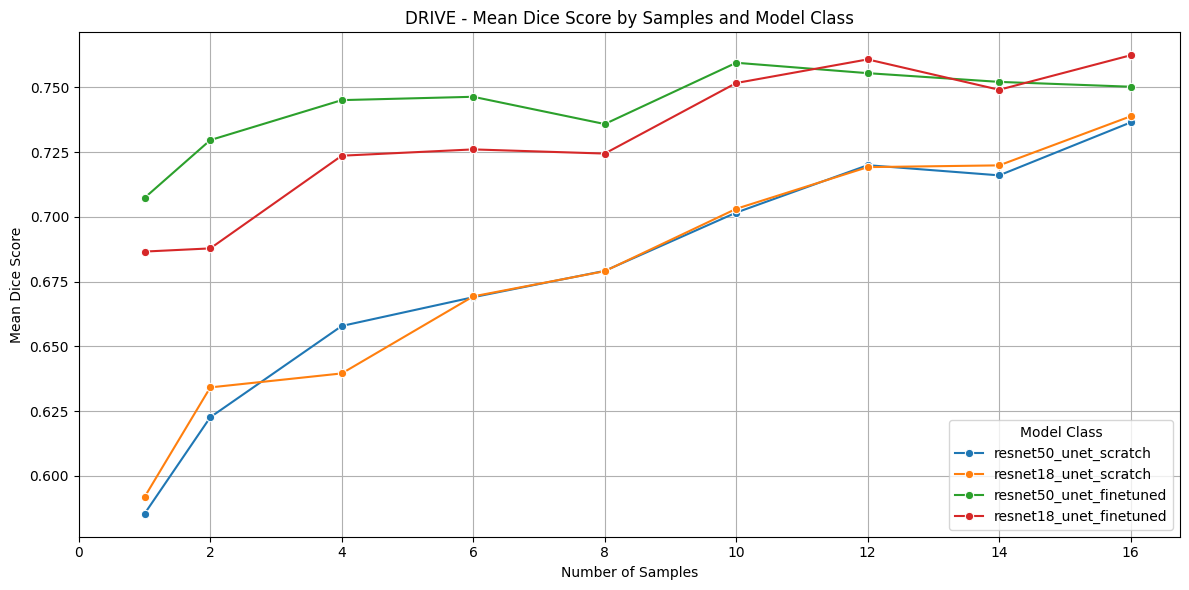

In [9]:
plot_mean_dice_score(all_stats_grouped_by_samples_drive, dataset_name='DRIVE')